<a href="https://colab.research.google.com/github/Dolce-Latte/Numerical_Differential_Equation/blob/main/Newton_Interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

In [2]:
def divided_diff(x, f):
  # function to calculate the divided difference table
  n = len(f)
  coef = np.zeros([n, n])
  coef[:, 0] = f

  for j in range(1, n):
    for i in range(n - j):
      coef[i][j] = (coef[i + 1][j - 1] - coef[i][j - 1]) / (x[i + j] - x[i])
  
  return coef

In [3]:
def newton_poly(coef, x_data, x):
  # evaluate the newton polynomial at x
  n = len(x_data) - 1
  p = coef[n]
  for k in range(1, n + 1):
    p = coef[n - k] + (x - x_data[n - k]) * p
  
  return p

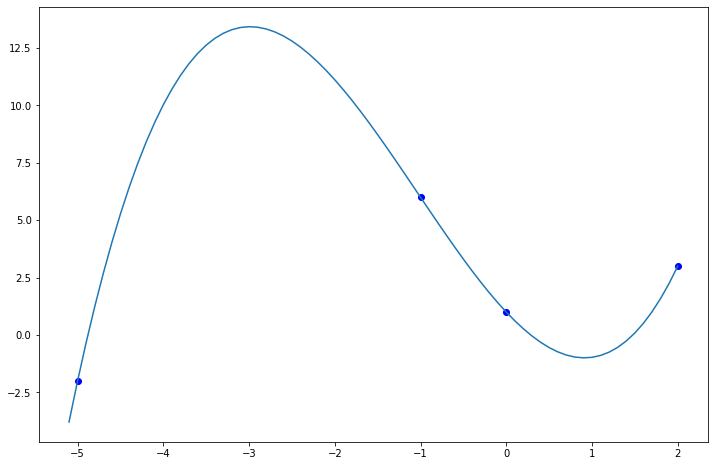

In [4]:
x = np.array([-5, -1, 0, 2])
f = np.array([-2, 6, 1, 3])
# get the divided difference coef
a_s = divided_diff(x, f)[0, :]

x_new = np.arange(-5.1, 2.1, 0.1)
f_new = newton_poly(a_s, x, x_new)

plt.figure(figsize=(12, 8))
plt.plot(x, f, 'bo')
plt.plot(x_new, f_new)